In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [12]:
df = pd.read_csv('energy_consumption.csv')
df['Datetime'] = pd.to_datetime(df['Datetime'], format='%Y-%m-%d %H:%M:%S')
df.set_index('Datetime', inplace=True)
df.sort_index(ascending=True, inplace=True)

In [22]:
df = df.loc['2018-01':'2018-06'].resample('1D').sum()
df['rolling_mean'] = df['PJME_MW'].rolling(10).mean()

<Axes: xlabel='Datetime'>

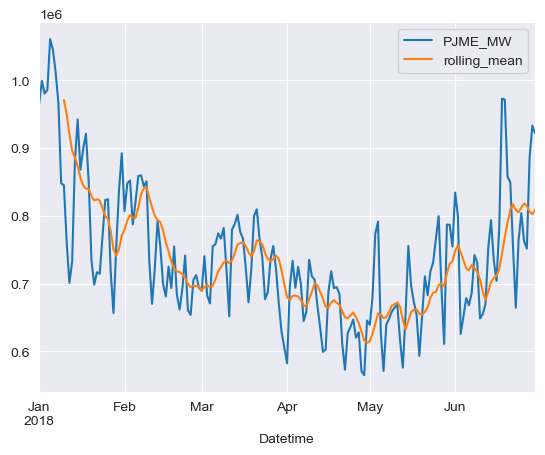

In [26]:
df.plot()

In [30]:
data = pd.read_csv('energy_consumption.csv', index_col=[0], parse_dates=[0])
data.sort_index(inplace=True)
data = data['2018-01':'2018-06'].resample('1D').sum()

In [31]:
decomposed = seasonal_decompose(data)

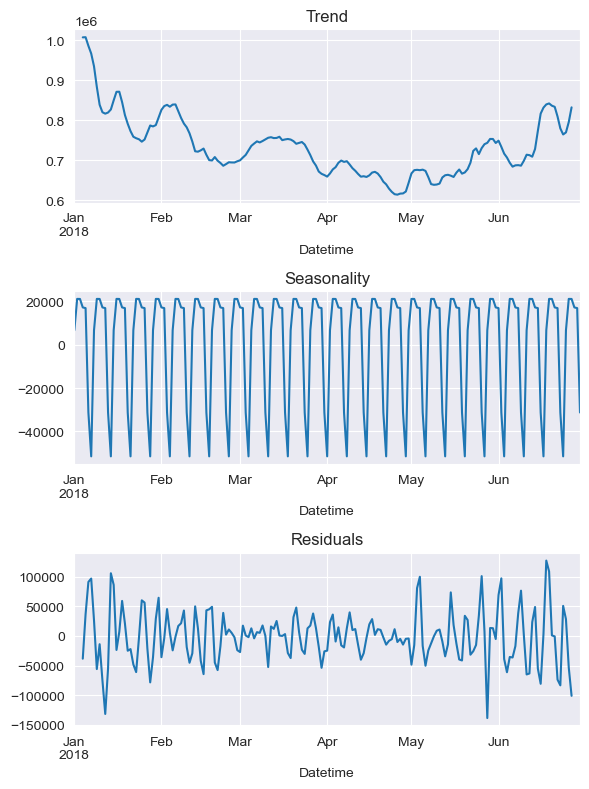

In [32]:
plt.figure(figsize=(6, 8))
plt.subplot(311)

decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)

decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)

decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

Text(0.5, 1.0, 'Seasonality')

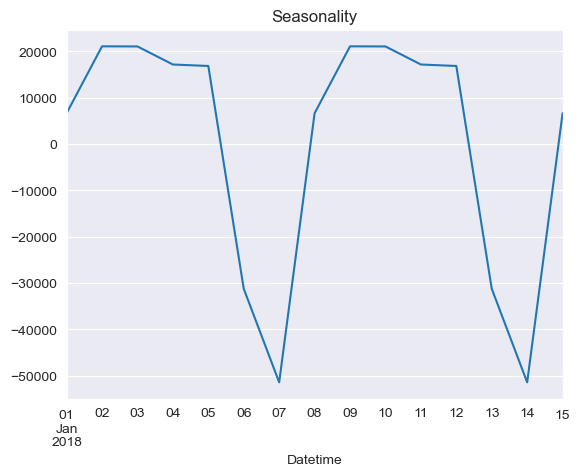

In [33]:
decomposed.seasonal.loc['2018-01-01':'2018-01-15'].plot(ax=plt.gca())
plt.title('Seasonality')